<a href="https://colab.research.google.com/github/kimsun75/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_myproject20240430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글폰트 설정 및 라이브러리 임포트

In [ ]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,884 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

# 필요한 라이브러리 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
##plt.rc('font', family='Malgun Gothic')    # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

# 빵덕후들의 지도
 - 제주도 서귀포시의 제과점 위치 정보를 제공하는 지도 시각화

## 파일 읽어서 데이터프레임 생성하기

In [ ]:
import pandas as pd
df = pd.read_csv('한국에너지공단_풍력기 위치정보_20210630.csv', encoding='cp949')
df.head()

,단지번호,단지명,풍력기번호(임시),준공일,분류,주소,엑스좌표(GRS80_C_x),와이좌표(GRS80_C_y),위도(lat),경도(lon)
0,6,신창,1,2006-03-01,육상,제주특별자치도 제주시,83531.84942,123482.8597,33.342449,126.178046
1,6,신창,2,2006-03-01,육상,제주특별자치도 제주시,83302.14433,122768.4956,33.340327,126.170393
2,7,양양,1,2006-06-01,육상,강원도 양양군 서면 영덕리,603371.11550,331391.2646,38.020849,128.496313
3,7,양양,2,2006-06-01,육상,강원도 양양군 서면 영덕리,602963.04500,331357.0051,38.017179,128.495848
4,5,강원,1,2006-09-01,육상,강원도 평창군 대관령면 횡계리,574840.71090,350869.2915,37.760890,128.712085


## 데이터 구조 탐색하기

In [ ]:
df.info() ##컬럼요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   단지번호             738 non-null    int64  
 1   단지명              738 non-null    object 
 2   풍력기번호(임시)        738 non-null    int64  
 3   준공일              738 non-null    object 
 4   분류               738 non-null    object 
 5   주소               737 non-null    object 
 6   엑스좌표(GRS80_C_x)  738 non-null    float64
 7   와이좌표(GRS80_C_y)  738 non-null    float64
 8   위도(lat)          738 non-null    float64
 9   경도(lon)          738 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 57.8+ KB


In [ ]:
df['위도(lat)'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
733    False
734    False
735    False
736    False
737    False
Name: 위도(lat), Length: 738, dtype: bool

In [ ]:
df['경도(lon)'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
733    False
734    False
735    False
736    False
737    False
Name: 경도(lon), Length: 738, dtype: bool

In [ ]:
#'업종명'컬럼의 데이터 확인하기
df['경도(lon)'].value_counts()

경도(lon)
126.178046    1
129.279846    1
126.172552    1
126.174880    1
126.176824    1
             ..
126.335986    1
126.372981    1
128.962122    1
128.962879    1
128.965669    1
Name: count, Length: 738, dtype: int64

In [ ]:
# 결측치 데이터 확인하기
# df.isnull()
df.isnull().sum()

단지번호               0
단지명                0
풍력기번호(임시)          0
준공일                0
분류                 0
주소                 1
엑스좌표(GRS80_C_x)    0
와이좌표(GRS80_C_y)    0
위도(lat)            0
경도(lon)            0
dtype: int64

## 데이터 전처리하기

### 이상치 확인하기
- 수치형 값을 갖는 '위도','경도' 컬럼에 이상치가 있는지 boxplot으로 확인

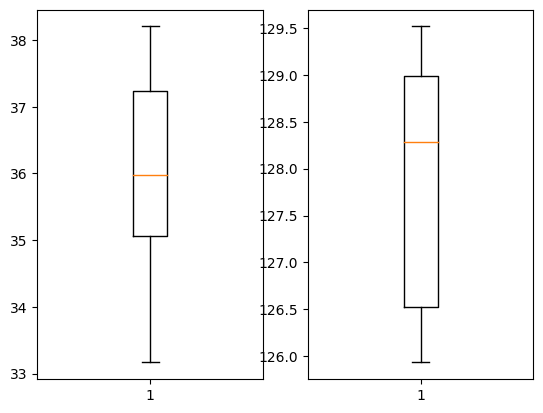

In [ ]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(121) # (1) 첫 번째 공간에 axes 생성
ax1.boxplot(df['위도(lat)'])
ax2 = plt.subplot(122)
ax2.boxplot(df['경도(lon)'])
plt.show()

In [ ]:
df

,단지번호,단지명,풍력기번호(임시),준공일,분류,주소,엑스좌표(GRS80_C_x),와이좌표(GRS80_C_y),위도(lat),경도(lon)
0,6,신창,1,2006-03-01,육상,제주특별자치도 제주시,83531.84942,123482.8597,33.342449,126.178046
1,6,신창,2,2006-03-01,육상,제주특별자치도 제주시,83302.14433,122768.4956,33.340327,126.170393
2,7,양양,1,2006-06-01,육상,강원도 양양군 서면 영덕리,603371.11550,331391.2646,38.020849,128.496313
3,7,양양,2,2006-06-01,육상,강원도 양양군 서면 영덕리,602963.04500,331357.0051,38.017179,128.495848
4,5,강원,1,2006-09-01,육상,강원도 평창군 대관령면 횡계리,574840.71090,350869.2915,37.760890,128.712085
...,...,...,...,...,...,...,...,...,...,...
733,110,태백 삼수,1,2020-11-01,육상,강원도 태백시 창죽동 산1-172번지,517846.61150,375220.1403,37.243340,128.974713
734,110,태백 삼수,2,2020-11-01,육상,강원도 태백시 창죽동 산1-172번지,517261.26720,374973.9727,37.238115,128.971803
735,110,태백 삼수,3,2020-11-01,육상,강원도 태백시 창죽동 산1-172번지,517123.42850,374750.3928,37.236916,128.969252
736,110,태백 삼수,4,2020-11-01,육상,강원도 태백시 창죽동 산1-172번지,516715.91650,374611.7329,37.233272,128.967595


### 불필요한 컬럼 삭제하기
- '소재지(도로명)' 컬럼 대신 '소재지(지번)'을 사용하면 되기 때문에 이 컬럼은 삭제한다
- '업종명', '데이터기준일자' 컬럼도 분석에 필요하지 않은 내용으로 보고 삭제한다.

In [48]:
df.drop(columns=['단지번호', '엑스좌표(GRS80_C_x)', '와이좌표(GRS80_C_y)','풍력기번호(임시)' ], axis=1, inplace=True) ##삭제할 컬림이 많으면 list 형식으로,  inplace=True : 바로 삭제 option
df.isnull().sum()

단지명        0
준공일        0
분류         0
주소         1
위도(lat)    0
경도(lon)    0
dtype: int64

In [ ]:
df.drop(columns='준공일',axis=1, inplace=True )

In [ ]:
df.head()

,단지명,분류,주소,위도(lat),경도(lon)
0,신창,육상,제주특별자치도 제주시,33.342449,126.178046
1,신창,육상,제주특별자치도 제주시,33.340327,126.170393
2,양양,육상,강원도 양양군 서면 영덕리,38.020849,128.496313
3,양양,육상,강원도 양양군 서면 영덕리,38.017179,128.495848
4,강원,육상,강원도 평창군 대관령면 횡계리,37.760890,128.712085


### 소재지(지번) 주소에서 읍,면,동 정보 추출하기

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 391 to 418
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지명      738 non-null    object 
 1   준공일      738 non-null    object 
 2   분류       738 non-null    object 
 3   주소       737 non-null    object 
 4   위도(lat)  738 non-null    float64
 5   경도(lon)  738 non-null    float64
dtypes: float64(2), object(4)
memory usage: 56.5+ KB


## 데이터 탐색하기

In [ ]:
df['단지명'].value_counts()

단지명
강원       49
영양       41
의령       25
영덕       24
영양양구     22
         ..
순천계월리     1
동복리마을     1
대불풍력      1
경포        1
월정마을      1
Name: count, Length: 107, dtype: int64

## 데이터 시각화 하기
- 지도위에 위치와 정보 표시하기
- folium 사용법 <br>
https://python-visualization.github.io/folium/quickstart.html#Getting-Started

### folium사용하기

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
folium.__version__

'0.14.0'

### 제과점 위치 마커 표시하기

In [51]:
df.head()

,단지명,준공일,분류,주소,위도(lat),경도(lon)
391,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.625787,129.207034
389,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.623901,129.213527
390,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.622617,129.210526
392,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.620894,129.211316
393,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.618900,129.212093


In [52]:
df.loc[0,'위도(lat)']




33.34244878

### 마커에 정보 넣기

In [53]:
for idx in df.index :
  lat = df.loc[idx,'위도(lat)']
  lng = df.loc[idx,'경도(lon)']
  marker = folium.Marker(
      location = [lat, lng],
      popup = f"<div style='width:100px'> <strong>{df.loc[idx,'단지명']}</strong><br>\
      {df.loc[idx, '단지명']}</div>",
      icon = folium.Icon(color='orange', icon='cloud')
      )
  marker.add_to(map)

map

In [54]:
##df.sort_values(by='읍면동')
##df.sort_values(by='읍면동', ascending=False)
##df.sort_values(by=['읍면동', '업소명'], ascending=False)
df = df.sort_values(by=['단지명'], ascending=True)
df


,단지명,준공일,분류,주소,위도(lat),경도(lon)
391,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.625787,129.207034
405,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.600381,129.218382
404,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.601232,129.221124
403,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.604886,129.219401
402,GS영양,2015-08-01,육상,경상북도 영양군 영양읍 무네미길 183-54 무창리 산 62,36.606628,129.218679
...,...,...,...,...,...,...
420,화순,2015-11-01,육상,전라남도 화순군,35.096715,127.060690
413,화순,2015-11-01,육상,전라남도 화순군,35.087238,127.066886
419,화순,2015-11-01,육상,전라남도 화순군,35.093049,127.054184
414,화순,2015-11-01,육상,전라남도 화순군,35.089480,127.065035


In [ ]:
# 읍면동별로 아이콘 컬러를 다르게 설정하기
# help(folium.Icon)
from folium.plugins import MarkerCluster

df = df.sort_values(by=['단지명'], ascending=True)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
v_idx = 0
v_color = 'orange'
v_단지명 = df.loc[v_idx, '단지명']



for idx in df.index :
    # 아이콘 색상 다르게 지정(읍면동별로)
    if df.loc[idx, '단지명'] == v_단지명:
        v_color = colors[v_idx]
    else:
        # 컬러 리스트의 색상을 모두 사용하면 다시 처음으로
        if len(colors)-1 == v_idx:
            v_idx = 0
        else:
            v_idx += 1
        v_color = colors[v_idx]
        v_단지명 = df.loc[idx, '단지명']



    lat = df.loc[idx,'위도(lat)']
    lng = df.loc[idx,'경도(lon)']
    marker = folium.Marker(
        location = [lat, lng],
        ##popup = f"<div style='width:100px'> <strong>{df.loc[idx,'단지명']}{df.loc[idx,'분류']} </strong><br>\
        popup = f"<div style='width:100px'> <strong>{df.loc[idx,'단지명']}={df.loc[idx,'분류']} </strong><br>\
        {df.loc[idx, '주소']}</div>",
        icon = folium.Icon(color=v_color, icon='cloud')
        )
    #marker.add_to(map)

    marker_cluster = MarkerCluster().add_to(map)
    marker.add_to(marker_cluster)


map

In [ ]:
# 데이터 정렬()
df = df.sort_values(by=['읍면동','업소명'], ascending=True)
# 읍면동별로 아이콘 컬러를 다르게 설정하기
# help(folium.Icon)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
v_idx = 0
v_color = 'orange'
v_읍면동 = df.loc[v_idx, '읍면동']
for idx in df.index :
    # 아이콘 색상 다르게 지정(읍면동별로)
    if df.loc[idx, '읍면동'] == v_읍면동:
        v_color = colors[v_idx]
    else:
        # 컬러의 새
        if len(colors)-1 == v_idx:
            v_idx = 0
        else:
            v_idx += 1
        v_color = colors[v_idx]
        v_읍면동 = df.loc[idx, '읍면동']
    lat = df.loc[idx,'위도']
    lng = df.loc[idx,'경도']
    marker = folium.Marker(
        location = [lat, lng],
        popup = f"<div style='width:100px'> <strong>{df.loc[idx,'업소명']}</strong><br>\
        {df.loc[idx, '소재지(지번)']}</div>",
        </div>",
        icon = folium.Icon(color=v_color, icon='cloud')
        )
    marker.add_to(map)
map







